In [1]:
import os
import re
import sys

import skimage.io as skio
import matplotlib.pyplot as plt

import numpy as np
import os
import sys
from math import sqrt

import cv2
import pandas as pd

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize, downscale_local_mean

import time

from PIL import Image
from skimage.feature import hog

from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from tensorflow import keras
from keras.utils import generic_utils
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.regularizers import l2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


import seaborn as sns

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
def ReadImageFolder(path):
    filepaths = [os.path.join(r,file) for r,d,f in os.walk(os.getcwd() + path) for file in f]
    ext = (".tif",".TIF",'.jpg')
    filepaths = [x for x in filepaths if x.endswith(ext)]
    return filepaths

In [4]:
Labels = [ ]
Labels_String = ["actin" , "dna" , "endosome" , "er" , "golgia" , 
               "golgpp" , "lysosome" , "microtubules" , "mitochondria",
               "nucleolus"]

path = "/DatasetPattern/actin"
actin_paths = ReadImageFolder(path)
for i in range(len(actin_paths)):
  Labels.append(0)

path = "/DatasetPattern/dna"
dna_paths = ReadImageFolder(path)
for i in range(len(dna_paths)):
  Labels.append(1)

path = "/DatasetPattern/endosome"
endosome_paths = ReadImageFolder(path)
for i in range(len(endosome_paths)):
  Labels.append(2)

path = "/DatasetPattern/er"
er_paths = ReadImageFolder(path)
for i in range(len(er_paths)):
  Labels.append(3)

path = "/DatasetPattern/golgia"
golgia_paths = ReadImageFolder(path)
for i in range(len(golgia_paths)):
  Labels.append(4)

path = "/DatasetPattern/golgpp"
golgpp_paths = ReadImageFolder(path)
for i in range(len(golgpp_paths)):
  Labels.append(5)

path = "/DatasetPattern/lysosome"
lysosome_paths = ReadImageFolder(path)
for i in range(len(lysosome_paths)):
  Labels.append(6)


path = "/DatasetPattern/microtubules"
microtubules_paths = ReadImageFolder(path)
for i in range(len(microtubules_paths)):
  Labels.append(7)

path = "/DatasetPattern/mitochondria"
mitochondria_paths = ReadImageFolder(path)
for i in range(len(mitochondria_paths)):
  Labels.append(8)

path = "/DatasetPattern/nucleolus"
nucleolus_paths = ReadImageFolder(path)
for i in range(len(nucleolus_paths)):
  Labels.append(9)


Paths_Array = [actin_paths , dna_paths , endosome_paths , er_paths , golgia_paths , 
               golgpp_paths , lysosome_paths , microtubules_paths , mitochondria_paths,
               nucleolus_paths]

In [5]:
def PrepareImagesArray(paths,AllImages_Array):

    for i in paths:

      img_arr = cv2.imread(i , cv2.IMREAD_GRAYSCALE)
        
      #img_size = 256
      #Reshaping images to preferred size
      #resized_arr = cv2.resize(img_arr, (img_size, img_size) , interpolation = cv2.INTER_CUBIC  ) 
      img_arr = img_arr.astype('float64')
      img_arr = (img_arr - img_arr.mean()) / (img_arr.std()) # New Normalize
    
      AllImages_Array.append(img_arr)

In [6]:
AllImages_Array = [ ]
for i in Paths_Array:
  PrepareImagesArray(i,AllImages_Array)
AllImages_Array_np = np.array(AllImages_Array)
AllImages_Array = [ ]

In [7]:
AllImages_Array_np = AllImages_Array_np.reshape(-1,382,382,1)

In [8]:
Labels_encoded = to_categorical(Labels, num_classes = 10)

In [9]:
x_train , x_test , y_train , y_test = train_test_split(AllImages_Array_np , Labels_encoded, test_size=0.15)
x_train , x_valid , y_train , y_valid = train_test_split(x_train , y_train, test_size=0.18)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)

print("x_valid shape",x_valid.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("y_valid shape",y_valid.shape)


x_train shape (600, 382, 382, 1)
x_test shape (130, 382, 382, 1)
x_valid shape (132, 382, 382, 1)
y_train shape (600, 10)
y_test shape (130, 10)
y_valid shape (132, 10)


In [13]:
model = Sequential()


model.add(Conv2D(filters = 32, kernel_size = (3,3), 
                 padding='same',  activation ='relu'
                 , input_shape = (382,382,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),
                 padding = 'same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),
                 padding = 'same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3),
                 padding = 'same', activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 382, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 191, 191, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 191, 191, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 95, 95, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 95, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 256)       2

In [14]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=12)

In [15]:
model.compile(optimizer = "Adam"  , loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
epochs = 60  # for better result increase the epochs
batch_size = 2

In [17]:
checkpoint_filepath = './tmp_cells/checkpoint'
mc = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True)

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=32,  # randomly rotate images in the range 32 degrees
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [19]:
'''
history = model.fit(x_train,y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (x_valid,y_valid),
                    steps_per_epoch=x_train.shape[0] // batch_size , callbacks=[es,mc])
'''

Epoch 1/60
300/300 [==============================] - 22s 49ms/step - loss: 1.9371 - accuracy: 0.2983 - val_loss: 1.3952 - val_accuracy: 0.4470

Epoch 00001: val_accuracy improved from -inf to 0.44697, saving model to ./tmp_cells\checkpoint
INFO:tensorflow:Assets written to: ./tmp_cells\checkpoint\assets
Epoch 2/60
300/300 [==============================] - 6s 19ms/step - loss: 1.0818 - accuracy: 0.6417 - val_loss: 1.2550 - val_accuracy: 0.6364

Epoch 00002: val_accuracy improved from 0.44697 to 0.63636, saving model to ./tmp_cells\checkpoint
INFO:tensorflow:Assets written to: ./tmp_cells\checkpoint\assets
Epoch 3/60
300/300 [==============================] - 6s 18ms/step - loss: 0.6311 - accuracy: 0.7900 - val_loss: 1.4795 - val_accuracy: 0.5379

Epoch 00003: val_accuracy did not improve from 0.63636
Epoch 4/60
300/300 [==============================] - 5s 18ms/step - loss: 0.3574 - accuracy: 0.8917 - val_loss: 1.9520 - val_accuracy: 0.5152

Epoch 00004: val_accuracy did not improve f

In [59]:
'''
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_valid,y_valid),
                    steps_per_epoch=x_train.shape[0] // batch_size , callbacks=[es,mc])
'''

Epoch 1/60
300/300 [==============================] - 14s 43ms/step - loss: 2.1380 - accuracy: 0.2383 - val_loss: 1.8062 - val_accuracy: 0.3561

Epoch 00001: val_accuracy improved from -inf to 0.35606, saving model to ./tmp_cells\checkpoint
INFO:tensorflow:Assets written to: ./tmp_cells\checkpoint\assets
Epoch 2/60
300/300 [==============================] - 11s 35ms/step - loss: 1.6349 - accuracy: 0.4300 - val_loss: 1.2561 - val_accuracy: 0.5530

Epoch 00002: val_accuracy improved from 0.35606 to 0.55303, saving model to ./tmp_cells\checkpoint
INFO:tensorflow:Assets written to: ./tmp_cells\checkpoint\assets
Epoch 3/60
300/300 [==============================] - 11s 35ms/step - loss: 1.1973 - accuracy: 0.5633 - val_loss: 1.1408 - val_accuracy: 0.5455

Epoch 00003: val_accuracy did not improve from 0.55303
Epoch 4/60
300/300 [==============================] - 11s 35ms/step - loss: 0.9319 - accuracy: 0.6567 - val_loss: 0.7909 - val_accuracy: 0.7045

Epoch 00004: val_accuracy improved from 

300/300 [==============================] - 10s 34ms/step - loss: 0.2706 - accuracy: 0.9133 - val_loss: 0.5337 - val_accuracy: 0.8182

Epoch 00037: val_accuracy did not improve from 0.87121
Epoch 38/60
300/300 [==============================] - 10s 34ms/step - loss: 0.2208 - accuracy: 0.9283 - val_loss: 1.0129 - val_accuracy: 0.7803

Epoch 00038: val_accuracy did not improve from 0.87121
Epoch 00038: early stopping


In [20]:
test_eval = model.evaluate(x_test, y_test, verbose=1)

5/5 [==============================] - 2s 43ms/step - loss: 2.4199 - accuracy: 0.6615


In [48]:
model.save("Model_cells_test1_beforecheckpoint.h5py")

INFO:tensorflow:Assets written to: Model_cells_test1.h5py\assets


In [82]:
model.load_weights(checkpoint_filepath)
model.save("Model_cells_test2_aftercheckpoint.h5py")
test_eval = model.evaluate(x_test, y_test, verbose=1)

INFO:tensorflow:Assets written to: Model_cells_test2_93.h5py\assets
5/5 [==============================] - 0s 44ms/step - loss: 1.5820 - accuracy: 0.7308


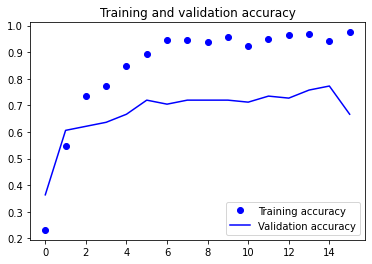

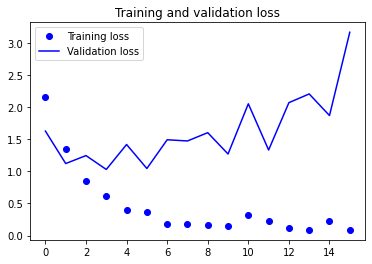

In [81]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
predicted_classes_all = model.predict(x_test)
predicted_classes_all = np.argmax(predicted_classes_all,axis=1)

In [23]:
True_classes_all = np.argmax(y_test,axis = 1) 

In [24]:
target_names = ["Class: {}".format(Labels_String[i]) for i in range(10)]
print(classification_report(True_classes_all, predicted_classes_all, target_names=target_names))

                     precision    recall  f1-score   support

       Class: actin       0.87      0.62      0.72        21
         Class: dna       1.00      1.00      1.00         9
    Class: endosome       0.47      0.73      0.57        11
          Class: er       0.72      0.93      0.81        14
      Class: golgia       0.64      0.64      0.64        14
      Class: golgpp       0.53      0.67      0.59        12
    Class: lysosome       0.75      0.40      0.52        15
Class: microtubules       0.36      0.50      0.42        10
Class: mitochondria       0.88      0.64      0.74        11
   Class: nucleolus       0.67      0.62      0.64        13

           accuracy                           0.66       130
          macro avg       0.69      0.67      0.67       130
       weighted avg       0.70      0.66      0.66       130



Found 121 correct labels
Class: 0 is actin
Class: 1 is dna
Class: 2 is endosome
Class: 3 is er
Class: 4 is golgia
Class: 5 is golgpp
Class: 6 is lysosome
Class: 7 is microtubules
Class: 8 is mitochondria
Class: 9 is nucleolus
[['actin' '20']
 ['dna' '16']
 ['endosome' '6']
 ['er' '12']
 ['golgia' '13']
 ['golgpp' '5']
 ['lysosome' '10']
 ['microtubules' '15']
 ['mitochondria' '12']
 ['nucleolus' '12']]


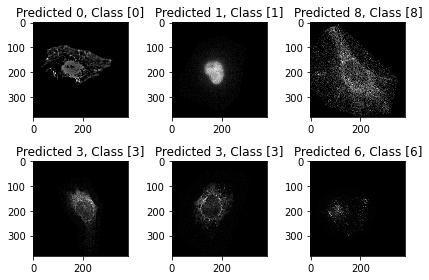

In [127]:
correct = np.where(predicted_classes_all==True_classes_all)[0]
print ("Found %d correct labels" % len(correct))
Labels_correct = [ ]
for i in range(len(correct)):
    Labels_correct.append(Labels_String[predicted_classes_all[correct[i]]])

for i in range(len(Labels_String)):
    print("Class: " + str(i) + " is " + Labels_String[i])
    
string_list_unique = np.array(Labels_correct)

(unique, counts) = np.unique(string_list_unique, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

for i, correct in enumerate(correct[60:66]):
    result=np.where(y_test[correct]==1)
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[correct].reshape(382,382,1),cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes_all[correct],
                                              result[0]))
    plt.tight_layout()

Found 44 Incorrect labels
[['actin' '2']
 ['endosome' '9']
 ['er' '5']
 ['golgia' '5']
 ['golgpp' '7']
 ['lysosome' '2']
 ['microtubules' '9']
 ['mitochondria' '1']
 ['nucleolus' '4']]


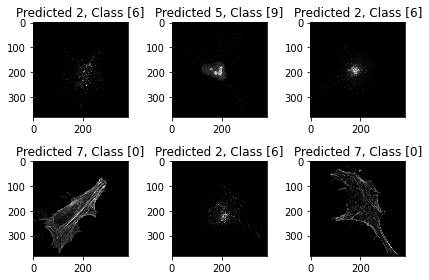

In [25]:
Incorrect = np.where(predicted_classes_all!=True_classes_all)[0]
print ("Found %d Incorrect labels" % len(Incorrect))
Labels_Incorrect = [ ]
for i in range(len(Incorrect)):
    Labels_Incorrect.append(Labels_String[predicted_classes_all[Incorrect[i]]])
string_list_unique = np.array(Labels_Incorrect)

(unique, counts) = np.unique(string_list_unique, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)


for i, Incorrect in enumerate(Incorrect[:6]):
    result=np.where(y_test[Incorrect]==1)
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[Incorrect].reshape(382,382,1),cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes_all[Incorrect],result[0]))
    plt.tight_layout()

In [137]:
IsIncorrect = [ ]
for i in range(len(True_classes_all)):
    if True_classes_all[i] != predicted_classes_all[i]:
        IsIncorrect.append("Incorrect Prediction")
    else:
        IsIncorrect.append("---")

In [138]:
Labels_output_true = [ ]
Labels_output_predicted = [ ]
for i in True_classes_all:
    Labels_output_true.append(Labels_String[i])
    Labels_output_predicted.append(Labels_String[i])

In [139]:
data = {'Predicted Labels': Labels_output_predicted ,
        'True Labels': Labels_output_true ,
        'Is Predicted Label Incorrect?': IsIncorrect}
df = pd.DataFrame(data)
df.index = np.arange(1, len(df)+1)

In [140]:
df.to_csv("TestResults_Cells_NotAugmented.csv", index_label = "Index")